In [1]:
from tensorflow.keras import Sequential,datasets
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D

In [2]:
import numpy as np
import matplotlib.pyplot as mplt
import os
from tensorflow.keras.layers import Dropout
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

In [19]:
(train_images,train_labels),(test_images,test_labels) = datasets.cifar10.load_data()

In [20]:
train_images.shape

(50000, 32, 32, 3)

In [21]:
train_labels.shape

(50000, 1)

In [22]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [23]:
train_labels = train_labels.reshape(-1,)
train_labels

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [24]:
test_labels = test_labels.reshape(-1,)
test_labels

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [16]:
labels_classes = ['Airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
np.size(labels_classes)

10

In [26]:
labels_classes[0]

'Airplane'

In [16]:
def show_img(feature,labels,index):
    mplt.imshow(feature[index])

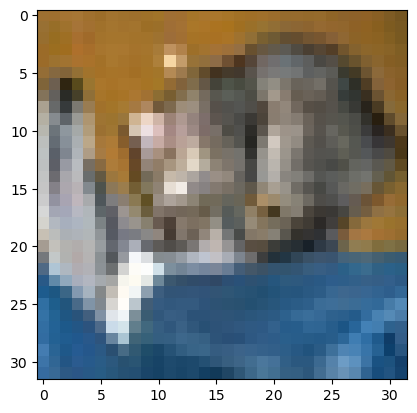

In [17]:
mplt.imshow(test_images[0])

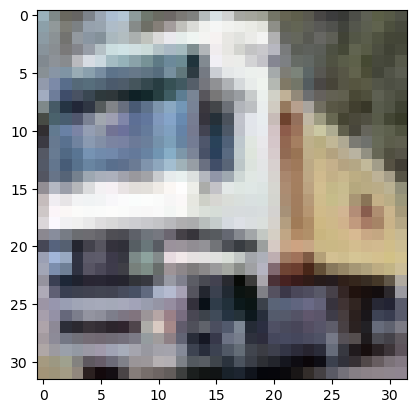

In [18]:
show_img(train_images,train_labels,1)

In [27]:
train_images = train_images/255
test_images = test_images/255

In [3]:
from tensorflow.keras import layers,models

In [4]:
from tensorflow.keras.layers import Dropout,LeakyReLU

In [5]:
from keras.layers import Activation,BatchNormalization,AveragePooling2D

In [112]:
cnn = Sequential()

cnn.add(Conv2D(filters=80,kernel_size=(2,2),input_shape=(32,32,3)))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU(alpha=0.2))
cnn.add(Conv2D(filters=120,kernel_size=(2,2)))
cnn.add(LeakyReLU(alpha=0.2))
cnn.add(AveragePooling2D(pool_size=(3,3)))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.2))

cnn.add(Conv2D(filters=80,kernel_size=(3,3)))
cnn.add(BatchNormalization())
cnn.add(LeakyReLU(alpha=0.2))
cnn.add(Conv2D(filters=120,kernel_size=(3,3)))
cnn.add(LeakyReLU(alpha=0.2))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.2))

cnn.add(Conv2D(filters=100,kernel_size=(2,2)))
cnn.add(LeakyReLU(alpha=0.2))
cnn.add(BatchNormalization())
cnn.add(Conv2D(filters=100,kernel_size=(2,2)))
cnn.add(LeakyReLU(alpha=0.2))
cnn.add(AveragePooling2D(pool_size=(3,3)))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.2))

cnn.add(Flatten())

cnn.add(Dense(80))
cnn.add(LeakyReLU(alpha=0.2))
cnn.add(BatchNormalization())

cnn.add(Dense(120))
cnn.add(LeakyReLU(alpha=0.2))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.2))

cnn.add(Dense(120))
cnn.add(LeakyReLU(alpha=0.2))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.2))

cnn.add(Dense(120))
cnn.add(LeakyReLU(alpha=0.2))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.2))

cnn.add(Dense(25))
cnn.add(LeakyReLU(alpha=0.3))
cnn.add(BatchNormalization())

cnn.add(Dense(10,activation='softmax'))

In [113]:
cnn.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_76 (Conv2D)          (None, 31, 31, 80)        1040      
                                                                 
 batch_normalization_71 (Ba  (None, 31, 31, 80)        320       
 tchNormalization)                                               
                                                                 
 leaky_re_lu_46 (LeakyReLU)  (None, 31, 31, 80)        0         
                                                                 
 conv2d_77 (Conv2D)          (None, 30, 30, 120)       38520     
                                                                 
 leaky_re_lu_47 (LeakyReLU)  (None, 30, 30, 120)       0         
                                                                 
 average_pooling2d_19 (Aver  (None, 10, 10, 120)       0         
 agePooling2D)                                       

In [114]:
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [115]:
from tensorflow.keras.callbacks import EarlyStopping

In [116]:
earlystopping = EarlyStopping(
    monitor = 'val_loss',
    patience = 6,
    restore_best_weights = True
)

In [117]:
cnn.fit(train_images,train_labels,epochs=30,batch_size=512,validation_data=(test_images,test_labels),
        callbacks=[earlystopping])

Epoch 1/30


2024-06-24 18:51:30.390029: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


98/98 [==============================] - ETA: 0s - loss: 1.8000 - accuracy: 0.3428

2024-06-24 18:52:29.110252: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


98/98 [==============================] - 64s 581ms/step - loss: 1.8000 - accuracy: 0.3428 - val_loss: 2.7409 - val_accuracy: 0.1214
Epoch 2/30
98/98 [==============================] - 52s 529ms/step - loss: 1.3682 - accuracy: 0.5085 - val_loss: 3.3059 - val_accuracy: 0.1049
Epoch 3/30
98/98 [==============================] - 52s 527ms/step - loss: 1.1618 - accuracy: 0.5900 - val_loss: 3.4498 - val_accuracy: 0.1023
Epoch 4/30
98/98 [==============================] - 52s 533ms/step - loss: 1.0367 - accuracy: 0.6379 - val_loss: 2.6780 - val_accuracy: 0.2147
Epoch 5/30
98/98 [==============================] - 52s 535ms/step - loss: 0.9494 - accuracy: 0.6706 - val_loss: 1.8423 - val_accuracy: 0.4440
Epoch 6/30
98/98 [==============================] - 54s 554ms/step - loss: 0.8761 - accuracy: 0.7001 - val_loss: 1.0681 - val_accuracy: 0.6315
Epoch 7/30
98/98 [==============================] - 53s 539ms/step - loss: 0.8243 - accuracy: 0.7194 - val_loss: 1.0420 - val_accuracy: 0.6535
Epoch 8/30

In [118]:
loss,accu = cnn.evaluate(test_images,test_labels)
print(f'Loss is:{loss:.2f} and Accuracy is:{accu*100:.2f}')

313/313 [==============================] - 6s 19ms/step - loss: 0.6850 - accuracy: 0.7703
Loss is:0.68 and Accuracy is:77.03


In [2]:
#cnn.save('cnn_model.h5')

In [6]:
from tensorflow import keras

In [7]:
cnn_model = keras.models.load_model('cnn_model.h5')
cnn_model

2024-06-25 13:00:58.202710: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-06-25 13:00:58.202739: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-06-25 13:00:58.202747: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-06-25 13:00:58.203192: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-25 13:00:58.203575: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [30]:
preds_prob = cnn_model.predict(test_images)
preds_prob

313/313 [==============================] - 5s 14ms/step


array([[8.6891437e-03, 4.4874111e-04, 2.0794760e-02, ..., 1.0290612e-03,
        1.5250671e-03, 2.6291367e-04],
       [2.0078966e-02, 6.3021660e-01, 4.3962646e-05, ..., 3.0972496e-05,
        3.4489241e-01, 4.6289228e-03],
       [3.5784978e-02, 2.2719460e-02, 1.0492017e-03, ..., 7.4324763e-04,
        9.2711258e-01, 6.5622223e-03],
       ...,
       [4.7442514e-05, 4.1505086e-06, 5.2893027e-03, ..., 1.3071694e-03,
        3.4926547e-05, 3.9508632e-05],
       [1.2475648e-02, 1.9985570e-03, 5.8333252e-02, ..., 8.7197162e-03,
        7.1875181e-04, 3.4716862e-04],
       [6.8939171e-06, 6.7124060e-06, 4.2052743e-06, ..., 9.9856240e-01,
        9.0209687e-06, 9.9828558e-06]], dtype=float32)

In [31]:
predictions = np.argmax(preds_prob,axis=1)
predictions

array([3, 1, 8, ..., 5, 4, 7])

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(test_labels,predictions)*100

77.03

In [8]:
import numpy as np

In [9]:
import requests

In [10]:
from PIL import Image

In [11]:
from io import BytesIO

In [13]:
load_preprocess_predict1('https://static-bestcolleges.tosshub.com/2024/News/kV29KfjpXuHCrTFpNQZHAlscd2MwtvBpFIPRLE8r.webp')

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.02745098, 0.0627451 , 0.09803922],
        [0.03137255, 0.06666667, 0.10588235],
        [0.03529412, 0

In [21]:

def load_preprocess_predict(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    resized = img.resize([32,32])
    img_arr = np.array(resized)
    scaled_img = img_arr/255
    mplt.imshow(scaled_img)
    declared_batch = np.expand_dims(scaled_img,axis=0)
    preds_prob = cnn_model.predict(declared_batch)
    category = np.argmax(preds_prob)
    print('The image is:',labels_classes[category])

1/1 [==============================] - 0s 24ms/step
The image is: automobile


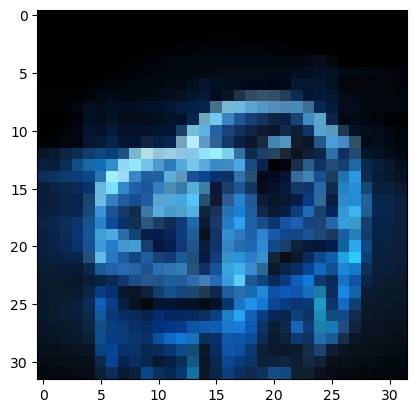

In [22]:
load_preprocess_predict('https://static-bestcolleges.tosshub.com/2024/News/kV29KfjpXuHCrTFpNQZHAlscd2MwtvBpFIPRLE8r.webp')

1/1 [==============================] - 0s 25ms/step
The image is: Airplane


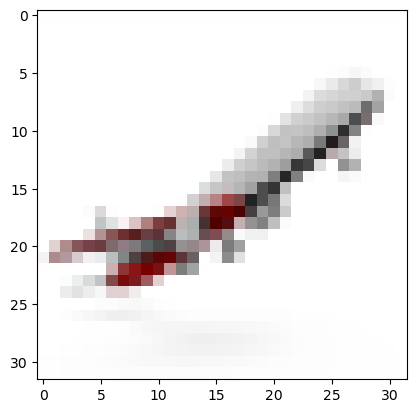

In [23]:
load_preprocess_predict('https://img.freepik.com/free-psd/plane-mockup_1310-1053.jpg?w=1800&t=st=1718983336~exp=1718983936~hmac=354bb9bcede3e95cb27c6608695325d45935d5655eeca805a9abbfa11624d24a')

1/1 [==============================] - 0s 24ms/step
The image is: automobile


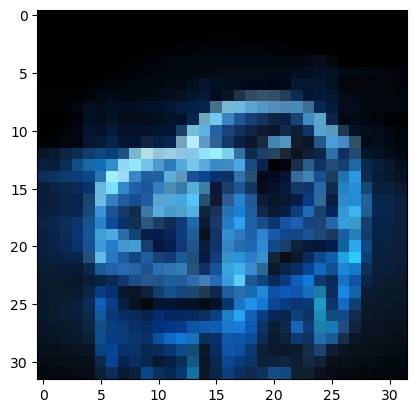

In [43]:
load_preprocess_predict('https://static-bestcolleges.tosshub.com/2024/News/kV29KfjpXuHCrTFpNQZHAlscd2MwtvBpFIPRLE8r.webp')

1/1 [==============================] - 0s 30ms/step
The image is: frog


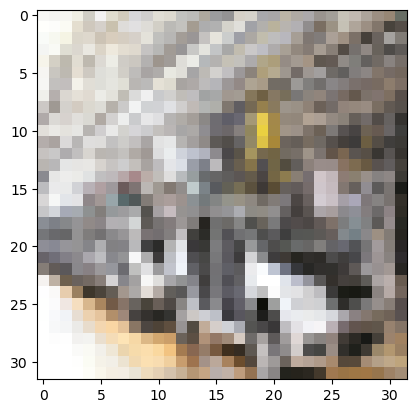

In [44]:
load_preprocess_predict('https://bsmedia.business-standard.com/_media/bs/img/article/2023-10/22/full/1697997699-3696.jpg?im=FeatureCrop,size=(826,465)')

1/1 [==============================] - 0s 26ms/step
The image is: Airplane


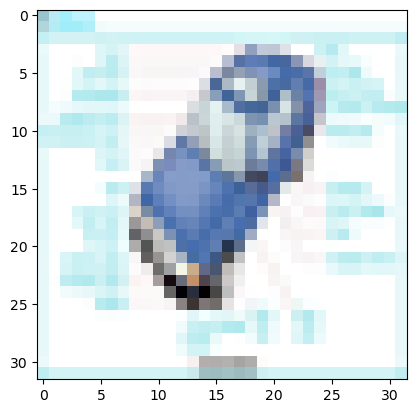

In [47]:
load_preprocess_predict('https://blogmedia.testbook.com/blog/wp-content/uploads/2023/10/type-of-automobiles-9df258b2.png')

1/1 [==============================] - 0s 24ms/step
The image is: truck


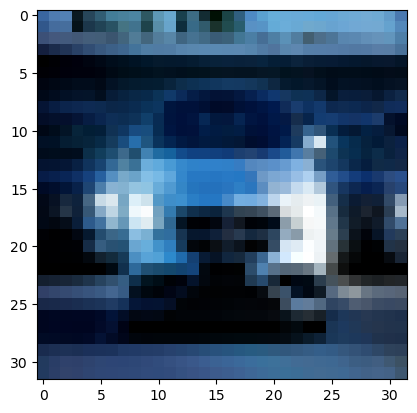

In [48]:
load_preprocess_predict('https://images.pexels.com/photos/120049/pexels-photo-120049.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2')

1/1 [==============================] - 0s 24ms/step
The image is: automobile


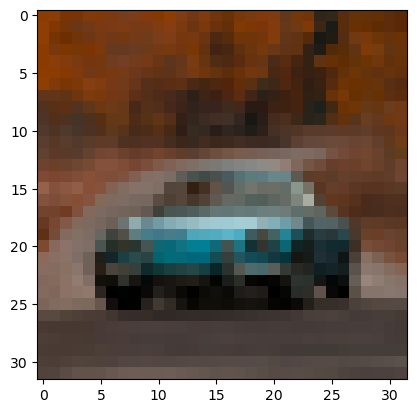

In [49]:
load_preprocess_predict('https://images.pexels.com/photos/1592384/pexels-photo-1592384.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2')